<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/plt_R_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

https://cran.r-project.org/

![R](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/100px-R_logo.svg.png)

# **Gráficos básicos**


**Desarrollo de gráficos comunes con R. Para el desarrollo de gráficos, se usa la siguiente función:**

~~~r
plot()
~~~

**La función tiene un comportamiento especial, porque dependiendo del tipo de dato, es el gráfico que genera. Además, para cada tipo de gráfico, se pueden ajustar diferentes parámetros.**

**Los tipos de datos:**

+ Continuo: Un vector numérico, entero, lógico o complejo.
+ Discreto: Un vector de factores o cadenas de texto.

|x       | y      |Gráfico |
|--------|--------|---------------------|
|Continuo|Continuo|Gráfico de dispersión|
|Continuo|Discreto|Gráfico de dispersión|
|Continuo|Ninguno |Gráfico de dispersión|
|Discreto|Continuo|Diagrama de caja|
|Discreto|Discreto|Gráfico de mosaico|
|Discreto|Ninguno |Gráfico de barras|



## **Obteniendo datos**

Se van a obtener datos de un archivo .CSV alojado en un repositorio público.

In [1]:
datos = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Datos_Banco.csv"

In [2]:
banco <- read.csv(file = datos, sep = ";")

In [3]:
head(banco)

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no
2,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no
3,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no
4,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no
5,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no
6,35,gerente,casado,terciaria,no,231,si,no,desconocido,5,may,139,1,-1,0,desconocido,no


La dimensión del dataframe indica que posee 45211 filas y 17 columnas.

In [4]:
dim(banco)

[1] 45211    17

## **Graficos**

Estos parámetros son para dar un tamaño específico al gráfico.

In [5]:
options(repr.plot.width=12, repr.plot.height=7)

### **Histograma**

Un histograma es un gráfico que  permite observar la distribución de los datos numéricos usando barras. Cada barra representa el número de veces (frecuencia) que se observaron datos en un rango determinado.

Si no se especifica ningún parámetro adicional a la función, entonces se obtiene un gráfico de la siguiente manera...

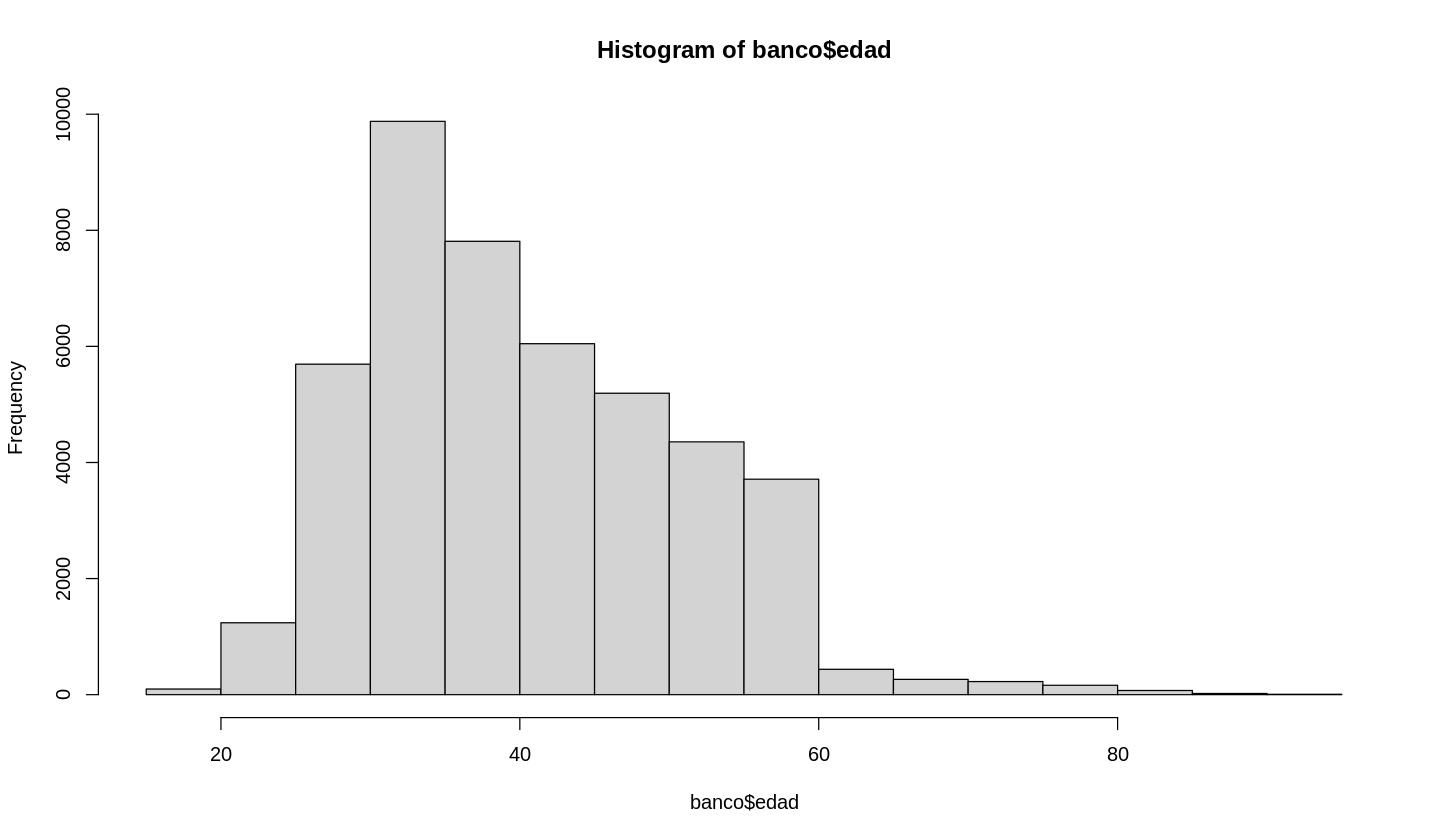

In [6]:
hist(x = banco$edad)

Ahora, se procede a agregar un título, con el parámetro main, y los nombres de los ejes $X$ e $Y$ con xlab e ylab respectivamente...

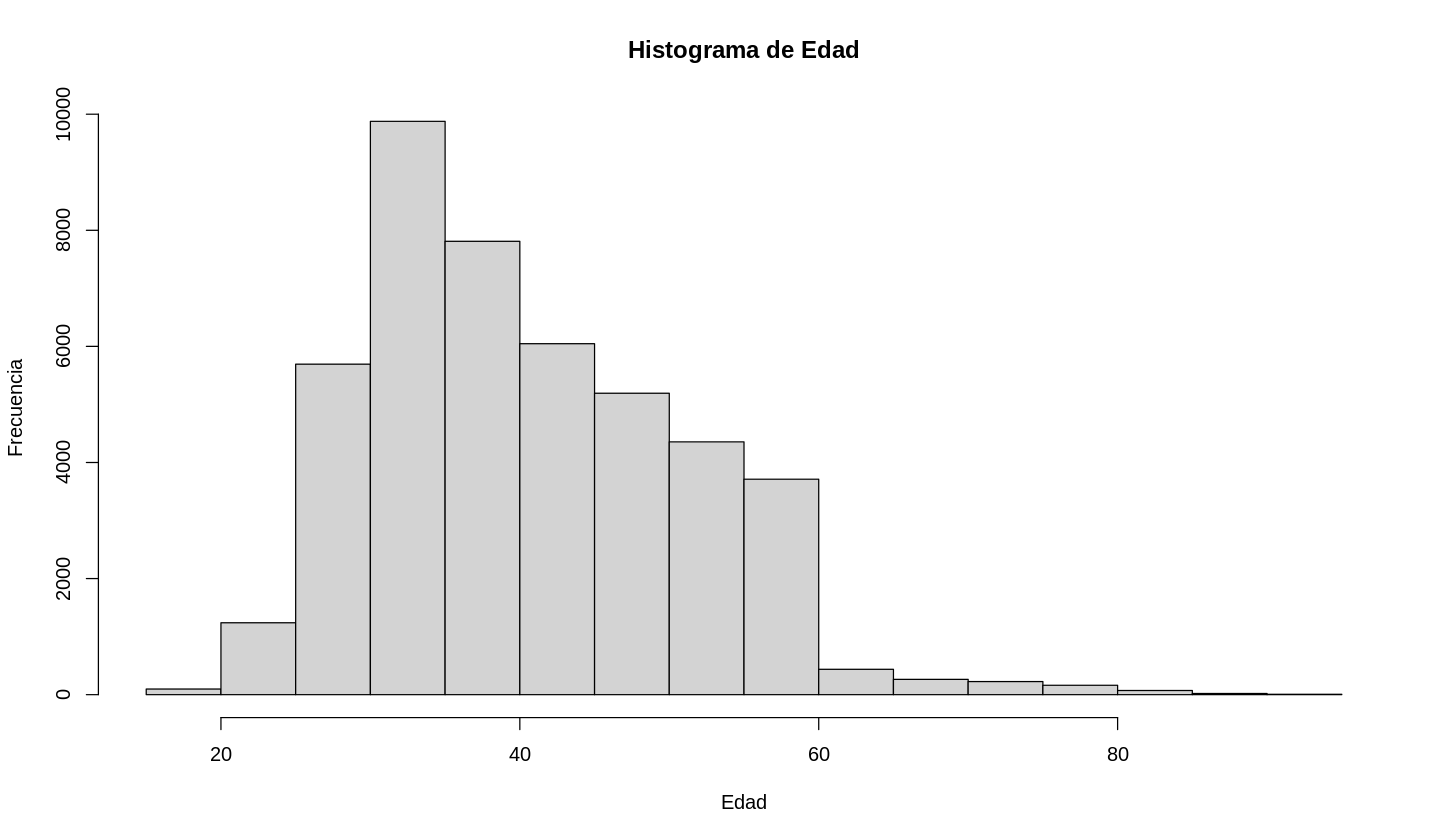

In [7]:
hist(x = banco$edad, 
main = "Histograma de Edad", 
xlab = "Edad", 
ylab = "Frecuencia")

Si se desea color en las barras del histograma, se lo selecciona en el parámetro col...

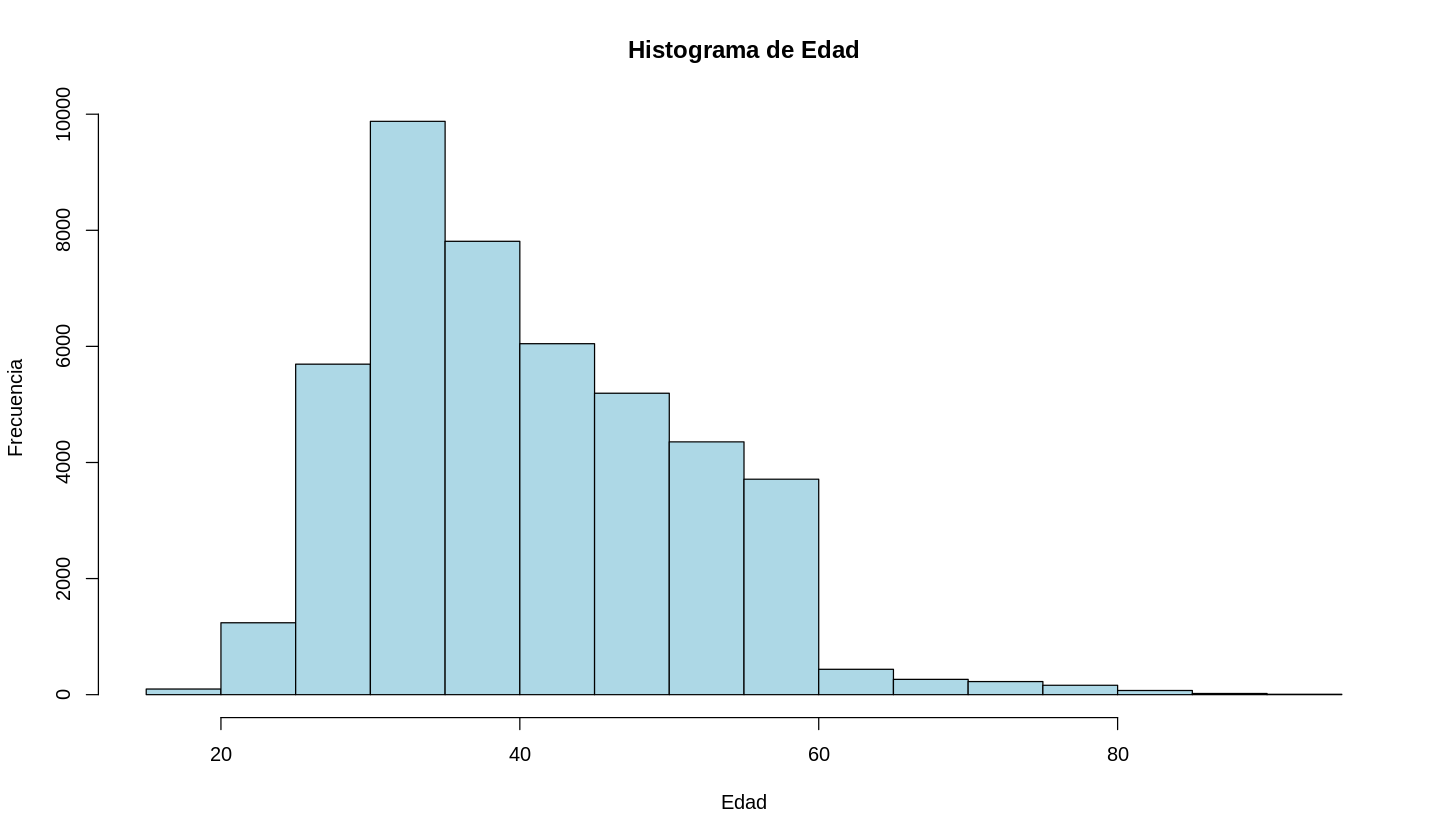

In [8]:
hist(x = banco$edad, 
main = "Histograma de Edad", 
xlab = "Edad", 
ylab = "Frecuencia",
col = "lightblue")

### **Gráfico de Barras**

Si bien, el tipo de dato de la columna educacion es un factor, hay que indicarlo para que el gráfico no arroje error...

In [40]:
banco$educacion = factor(banco$educacion)

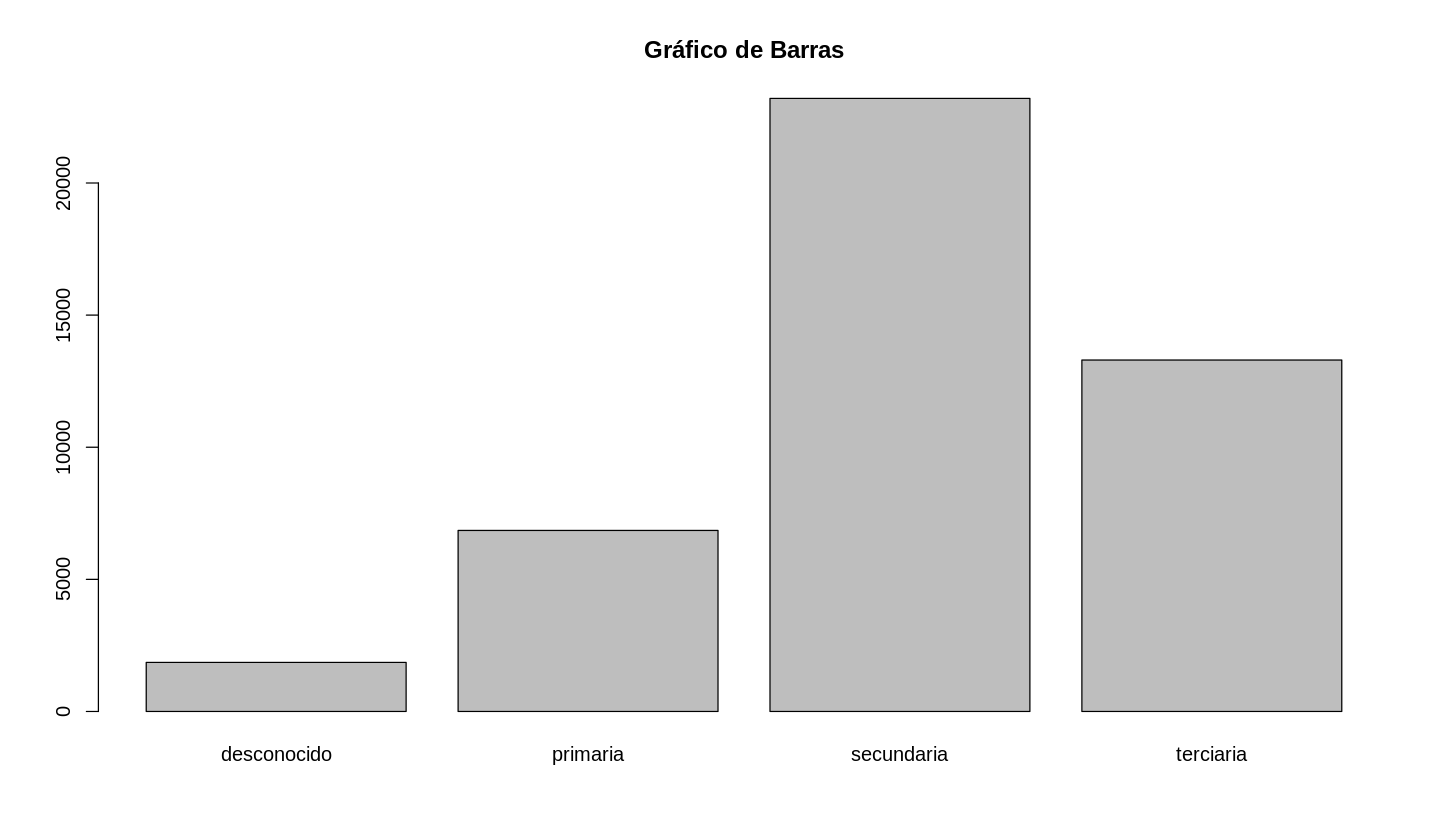

In [42]:
plot(x = banco$educacion,
main = "Gráfico de Barras")

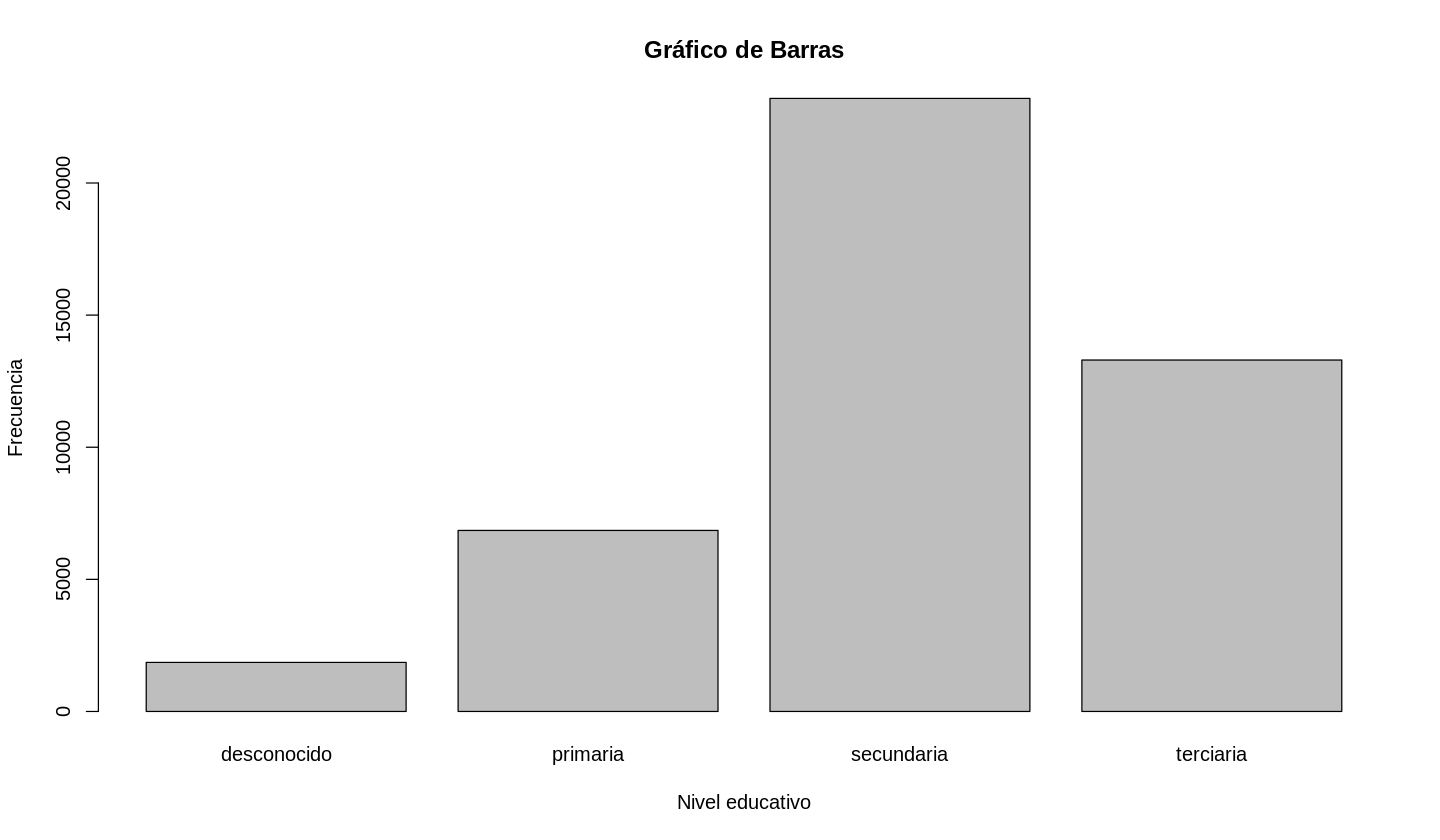

In [43]:
plot(x = banco$educacion,
main = "Gráfico de Barras",
xlab = "Nivel educativo",
ylab = "Frecuencia")

Se le puede dar un color a cada barra, para ello, se debe generar un vector con los colores deseados, y ese vector es el valor del parámetro col...

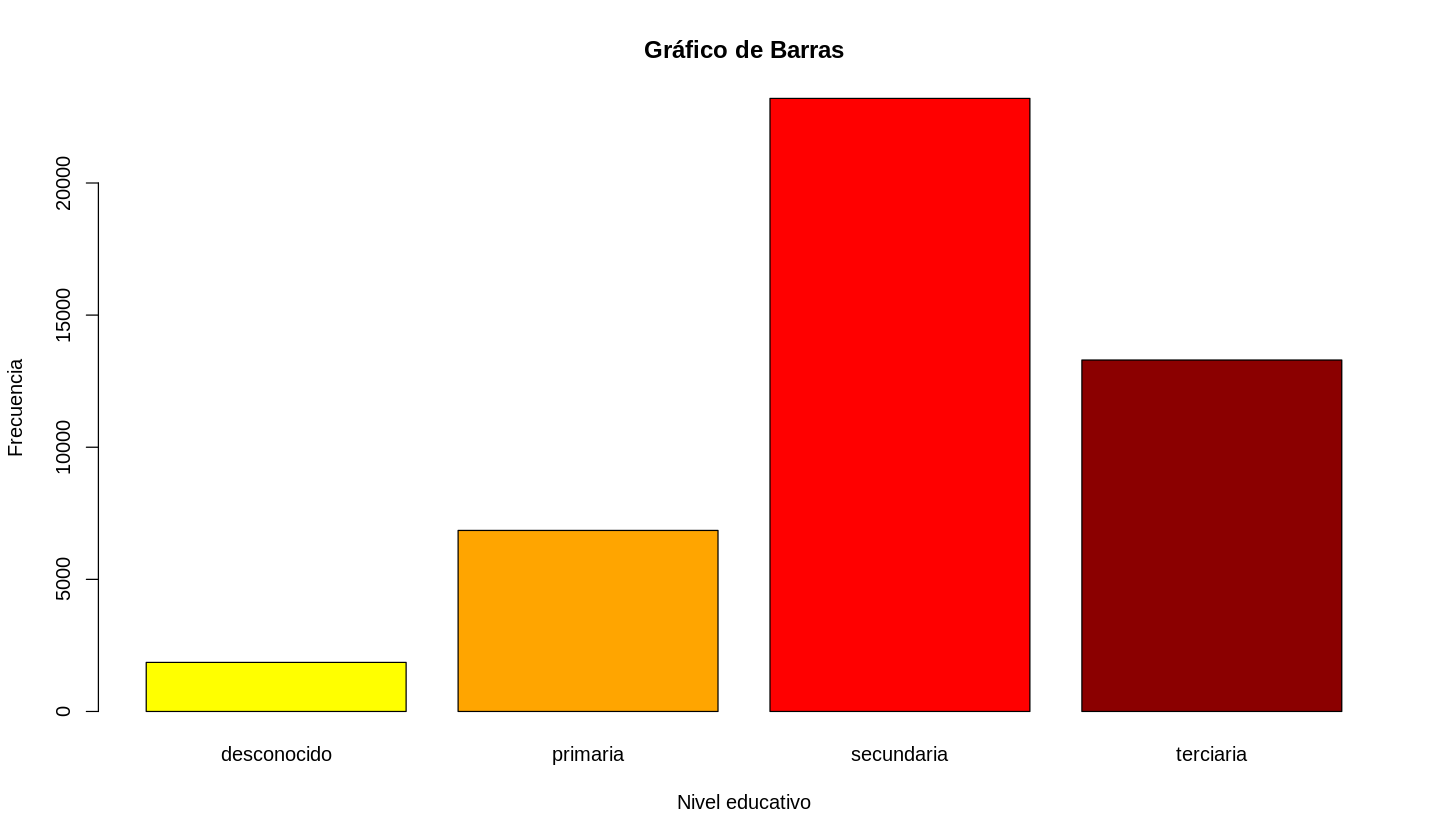

In [44]:
plot(x = banco$educacion,
main = "Gráfico de Barras",
xlab = "Nivel educativo",
ylab = "Frecuencia",
col = c("yellow", "orange", "red", "darkred"))

### **Diagrama de Dispersión**

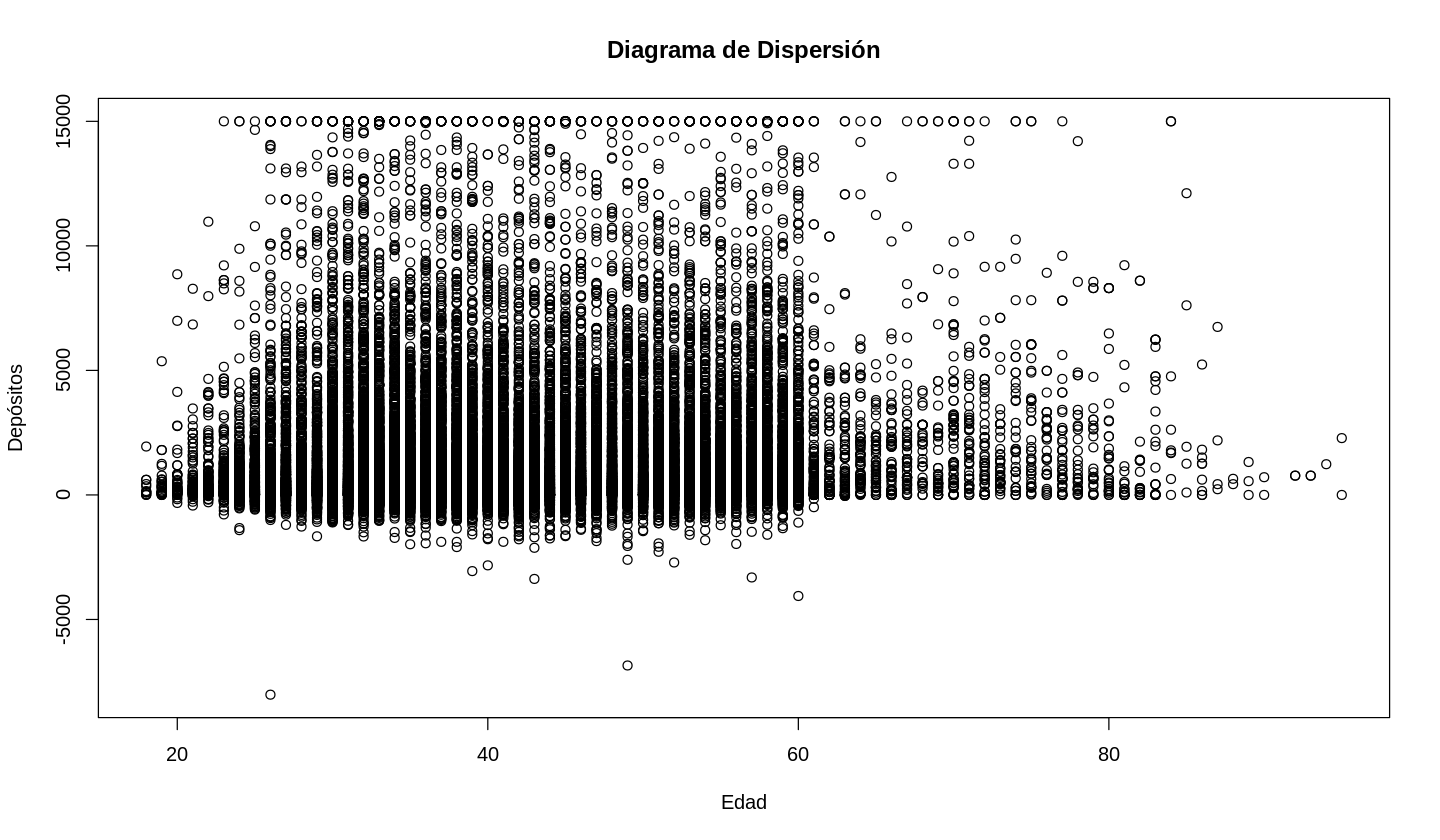

In [20]:
plot(x = banco$edad, 
y = banco$deposito,
main = "Diagrama de Dispersión", 
xlab = "Edad", 
ylab = "Depósitos") 

Como el diagrama de dispersión tiene muchos valores, se simplifica con valores hasta 10000...

In [16]:
banco$deposito <- ifelse(banco$deposito > 10000, 10000, banco$deposito)

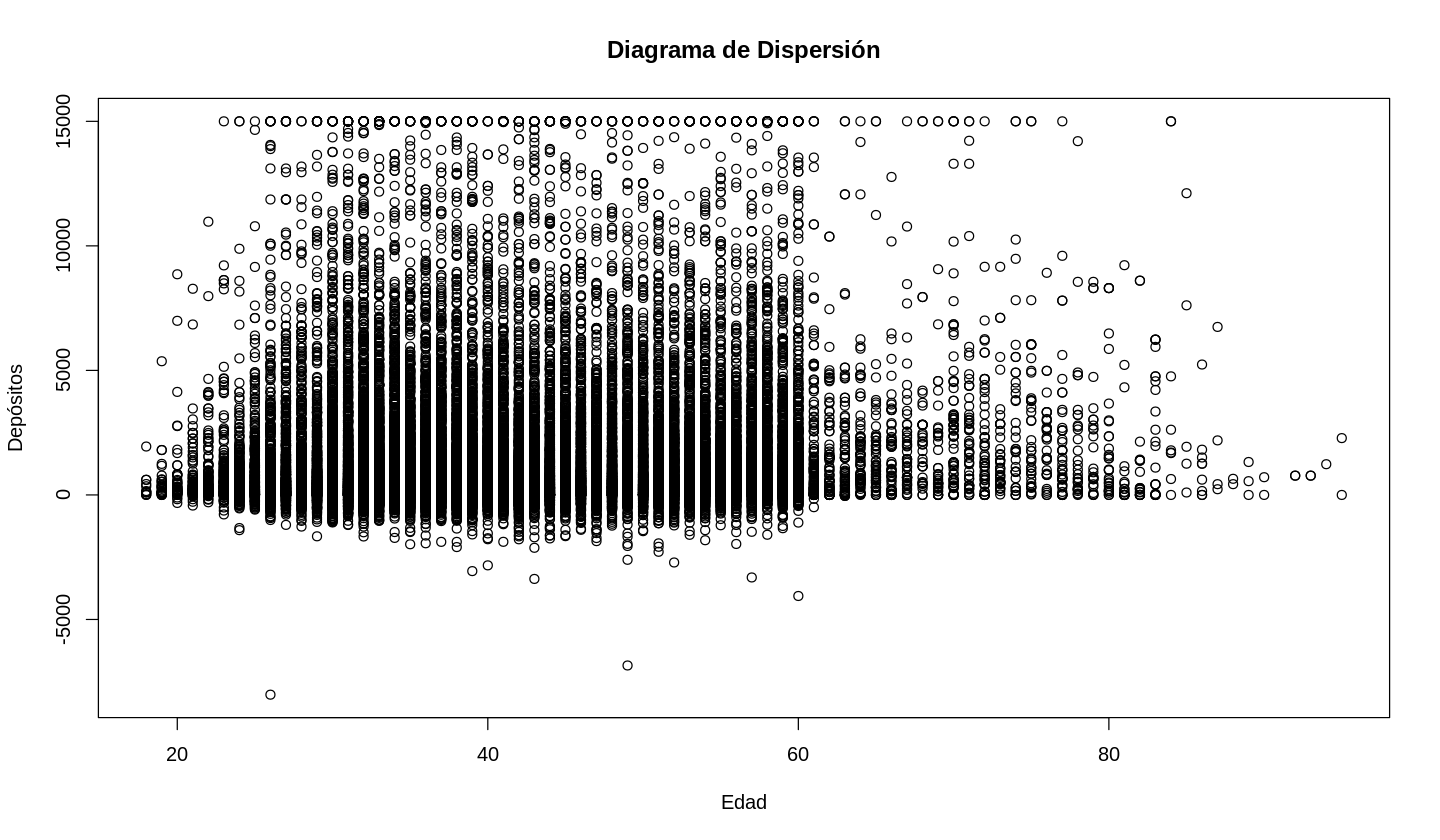

In [21]:
plot(x = banco$edad, 
y = banco$deposito,
main = "Diagrama de Dispersión", 
xlab = "Edad", 
ylab = "Depósitos")

Se puede colorear, teniendo en cuenta una tercera variable, como por ejemplo, si los clientes del banco poseen préstamos...

In [45]:
banco$prestamo = factor(banco$prestamo)

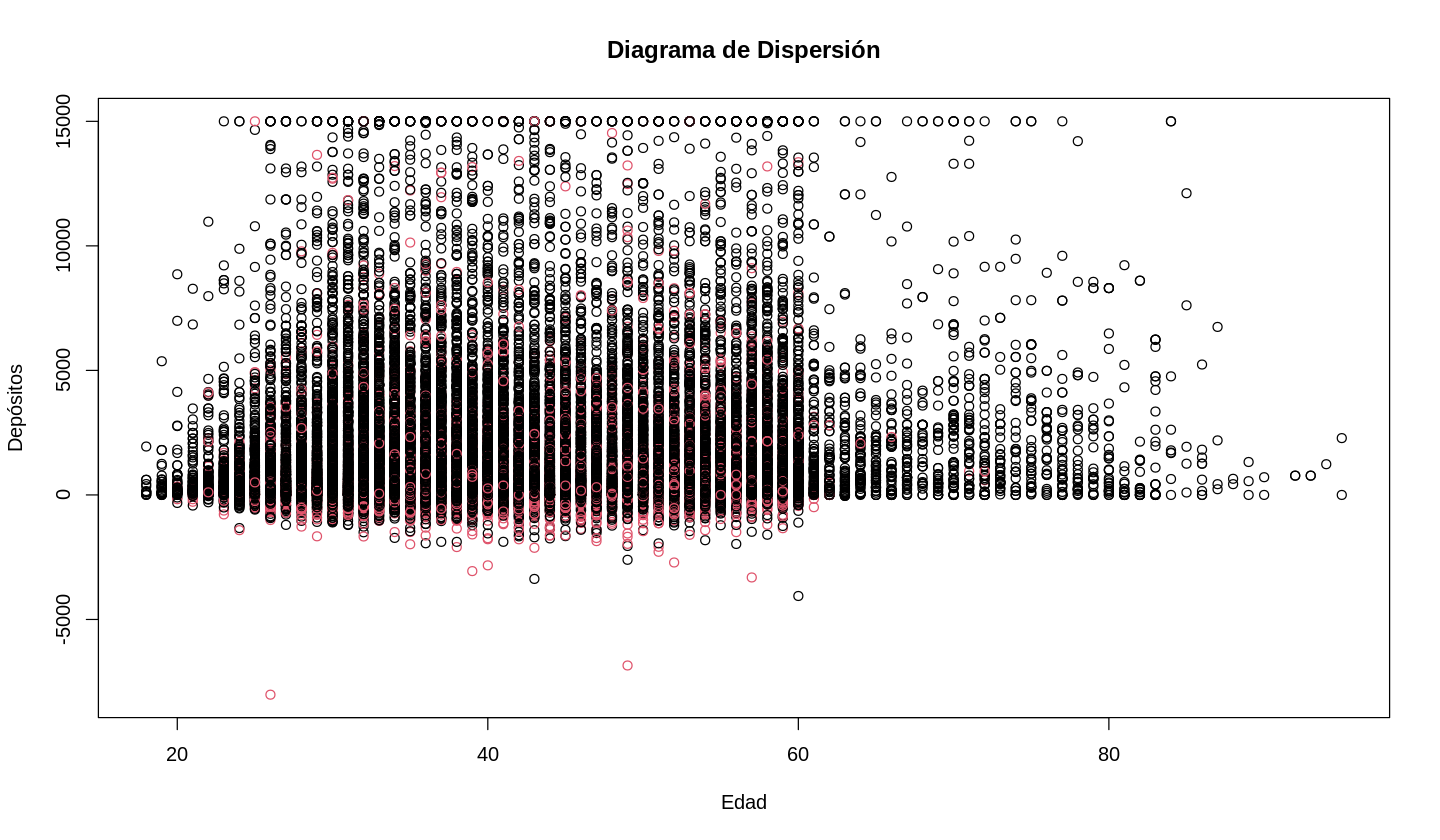

In [46]:
plot(x = banco$edad, 
y = banco$deposito,
main = "Diagrama de Dispersión", 
xlab = "Edad", 
ylab = "Depósitos",
col = banco$prestamo)

Y se puede agregar una leyenda, para interpretar mejor el gráfico...

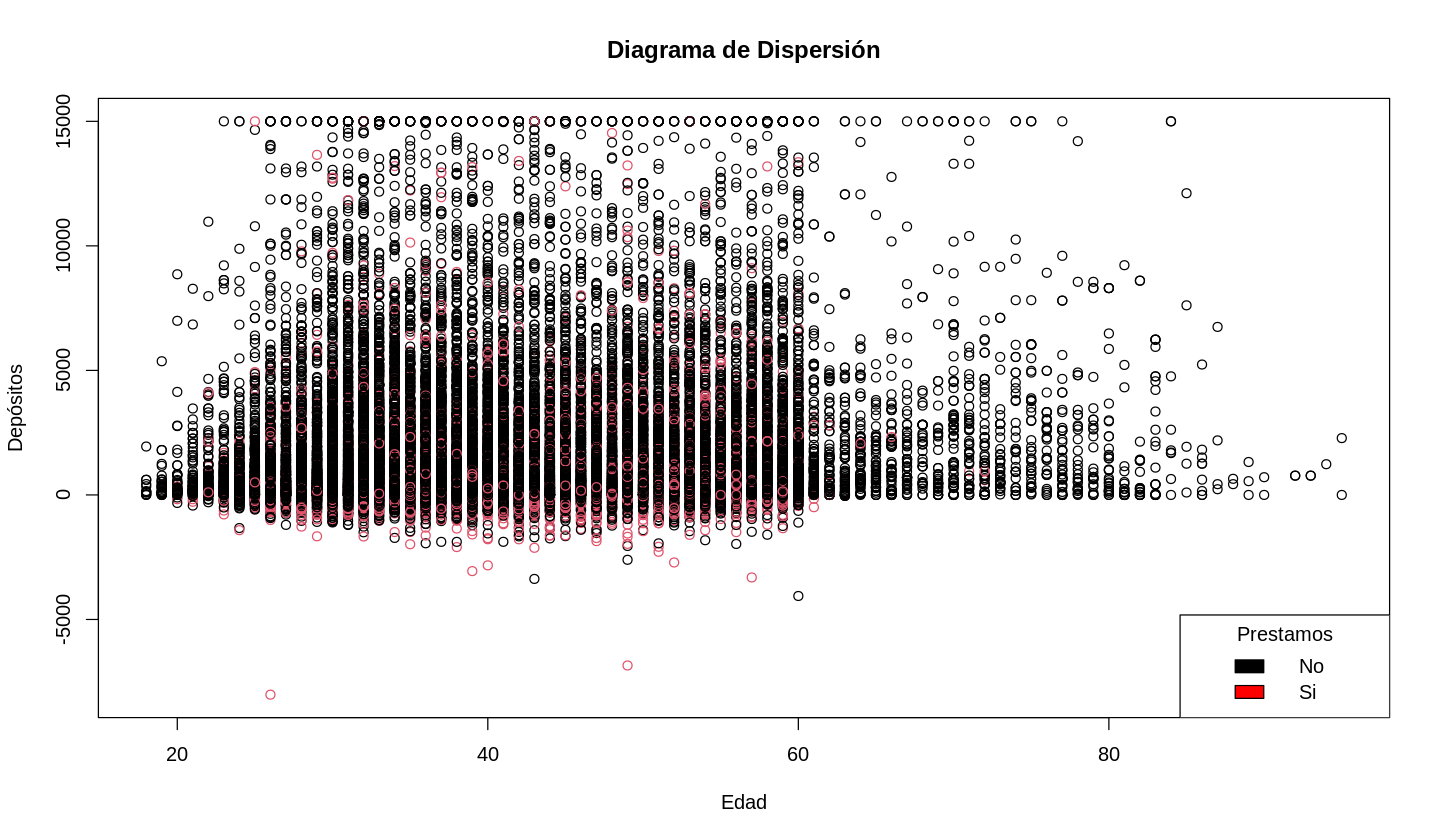

In [49]:
plot(x = banco$edad, 
y = banco$deposito,
main = "Diagrama de Dispersión", 
xlab = "Edad", 
ylab = "Depósitos",
col = banco$prestamo)

legend(x = "bottomright", 
legend = c("No", "Si"), 
fill = c("Black", "Red"), 
title = "Prestamos")

### **Diagrama de Caja**

Estos gráficos muestran la distribución de una variable usando cuartiles, y   de manera visual se puede inferir sobre su dispersión, ubicación y simetría...

Este gráfico dibuja un rectángulo cruzado por una línea recta horizontal. Esta linea recta representa la mediana, el segundo cuartil, su base representa el pimer cuartil y su parte superior el tercer cuartil. 

El rango, entre el primer y tercer cuartil es la caja.

In [23]:
banco$educacion = factor(banco$educacion)

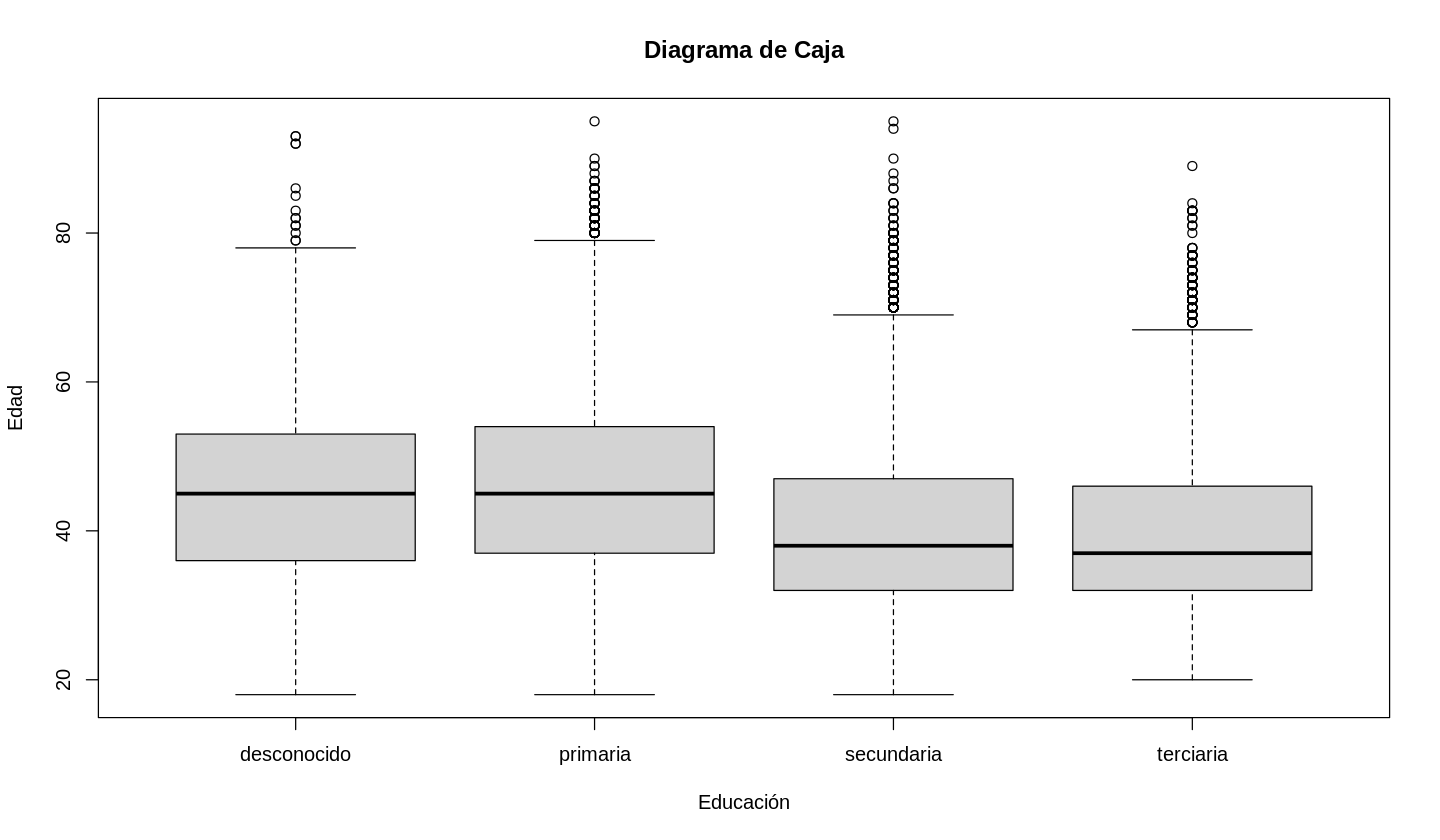

In [25]:
plot(x = banco$educacion, 
y = banco$edad,
main = "Diagrama de Caja", 
xlab = "Educación", 
ylab = "Edad")

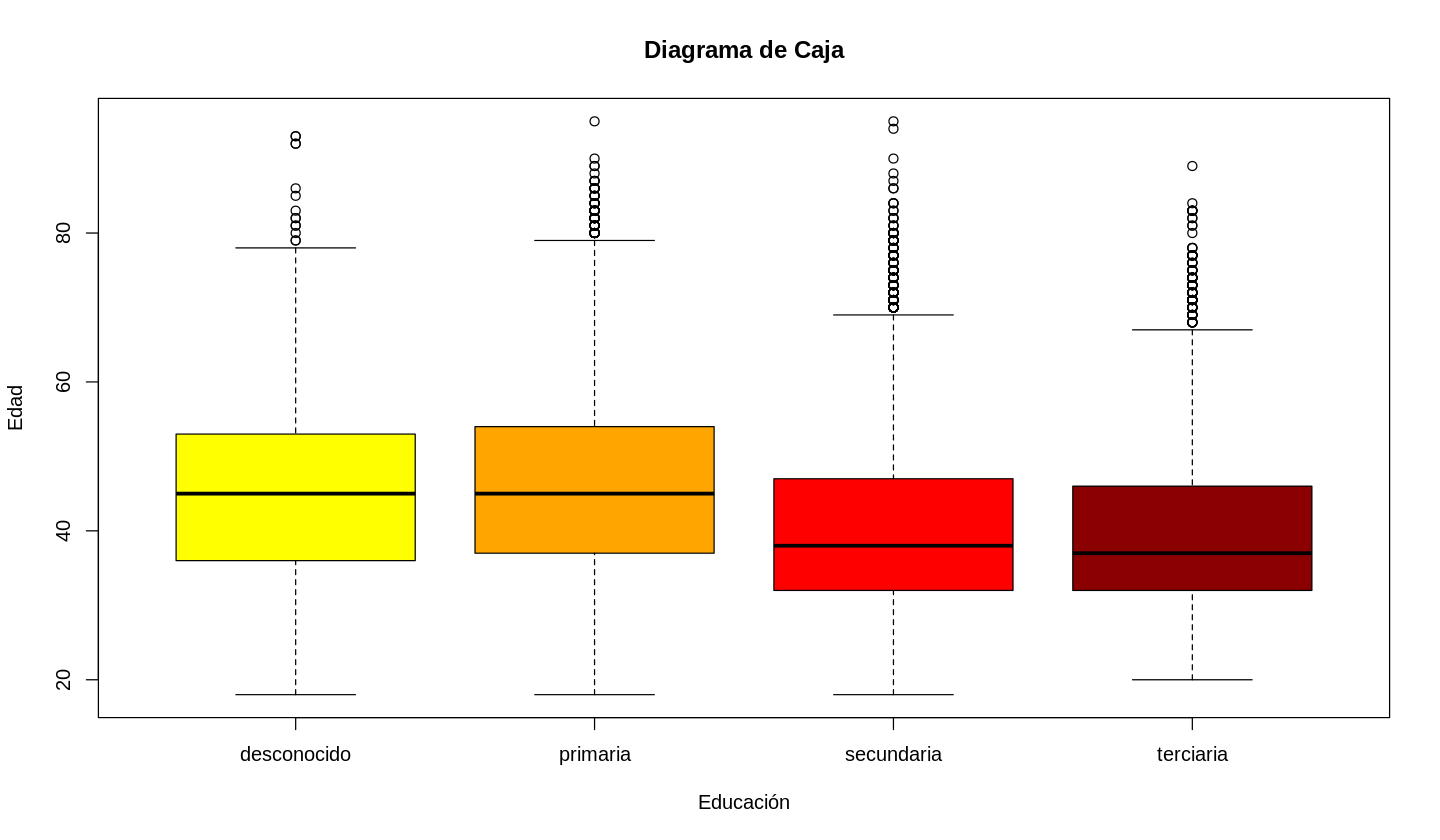

In [27]:
plot(x = banco$educacion, 
y = banco$edad,
main = "Diagrama de Caja", 
xlab = "Educación", 
ylab = "Edad",
col = c("yellow", "orange", "red", "darkred"))

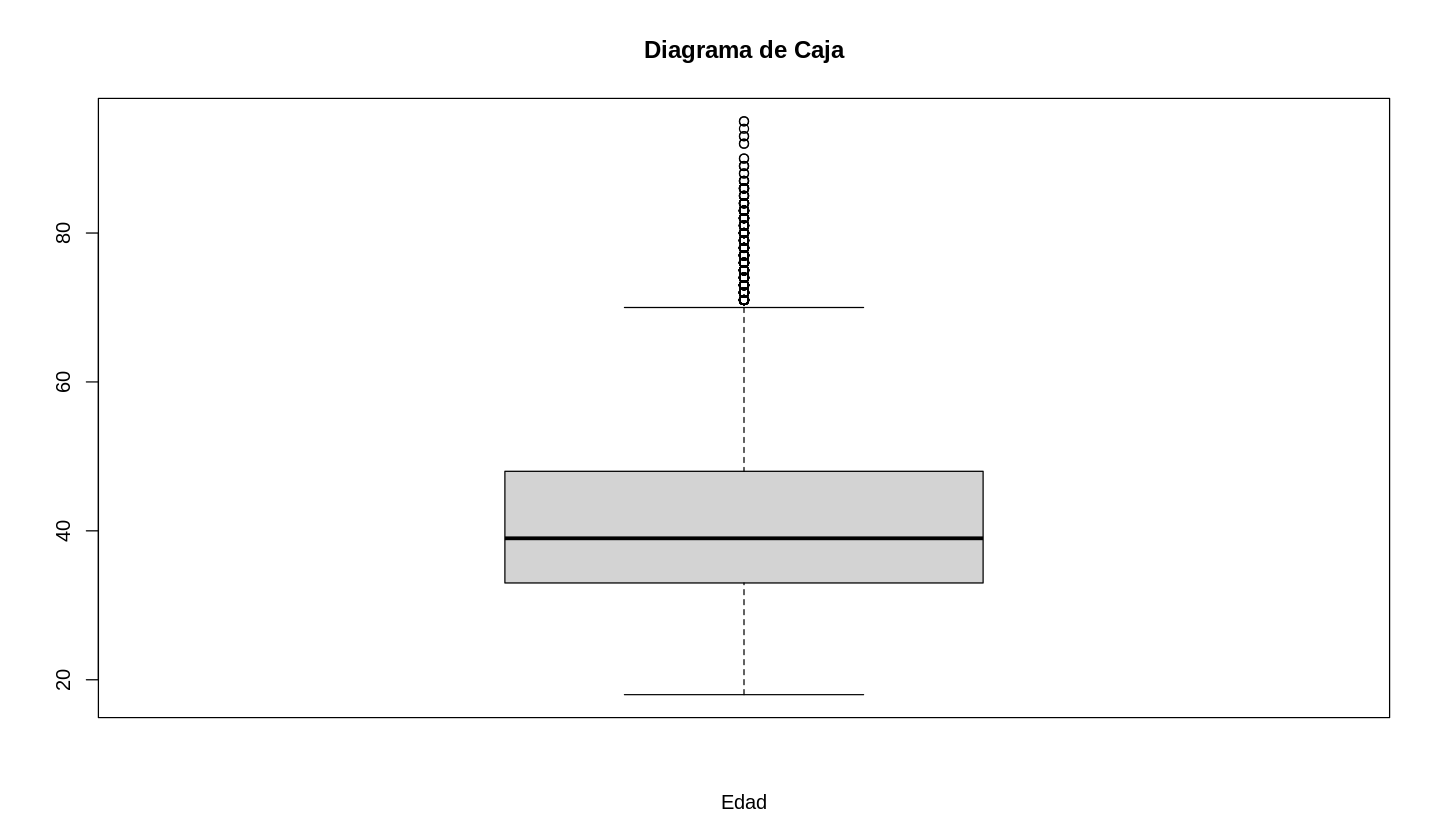

In [36]:
boxplot(x = banco$edad,
main = "Diagrama de Caja", 
xlab = "Edad")

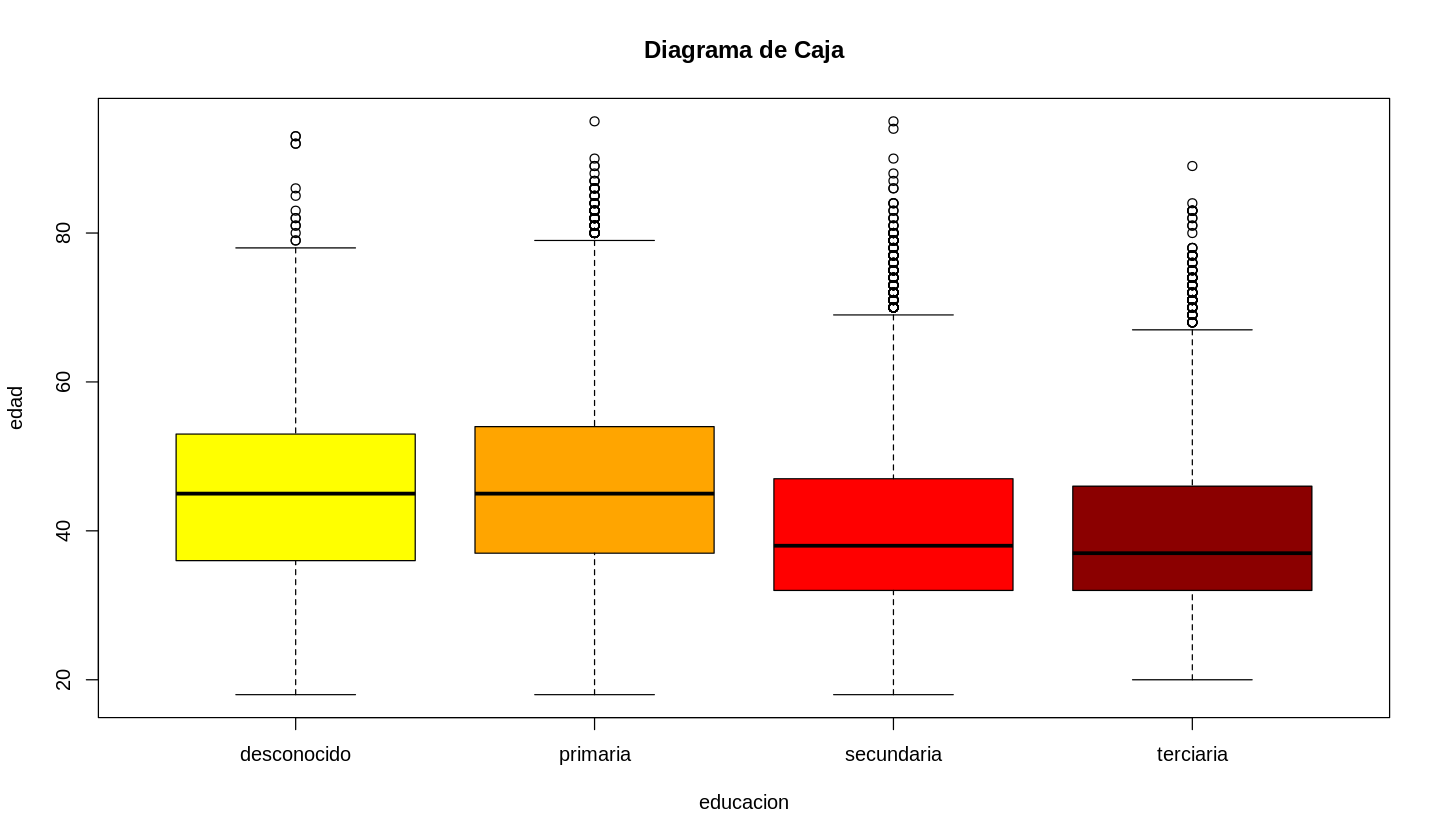

In [37]:
boxplot(formula = edad ~ educacion, 
data =  banco,
main = "Diagrama de Caja", 
col = c("yellow", "orange", "red", "darkred"))

### **Gráfico de Mosaico**

Estos gráficos son usados para mostrar la relación entre dos variables discretas, ya sean factores o cadenas de texto.

In [32]:
banco$civil = factor(banco$civil)
banco$educacion = factor(banco$educacion)

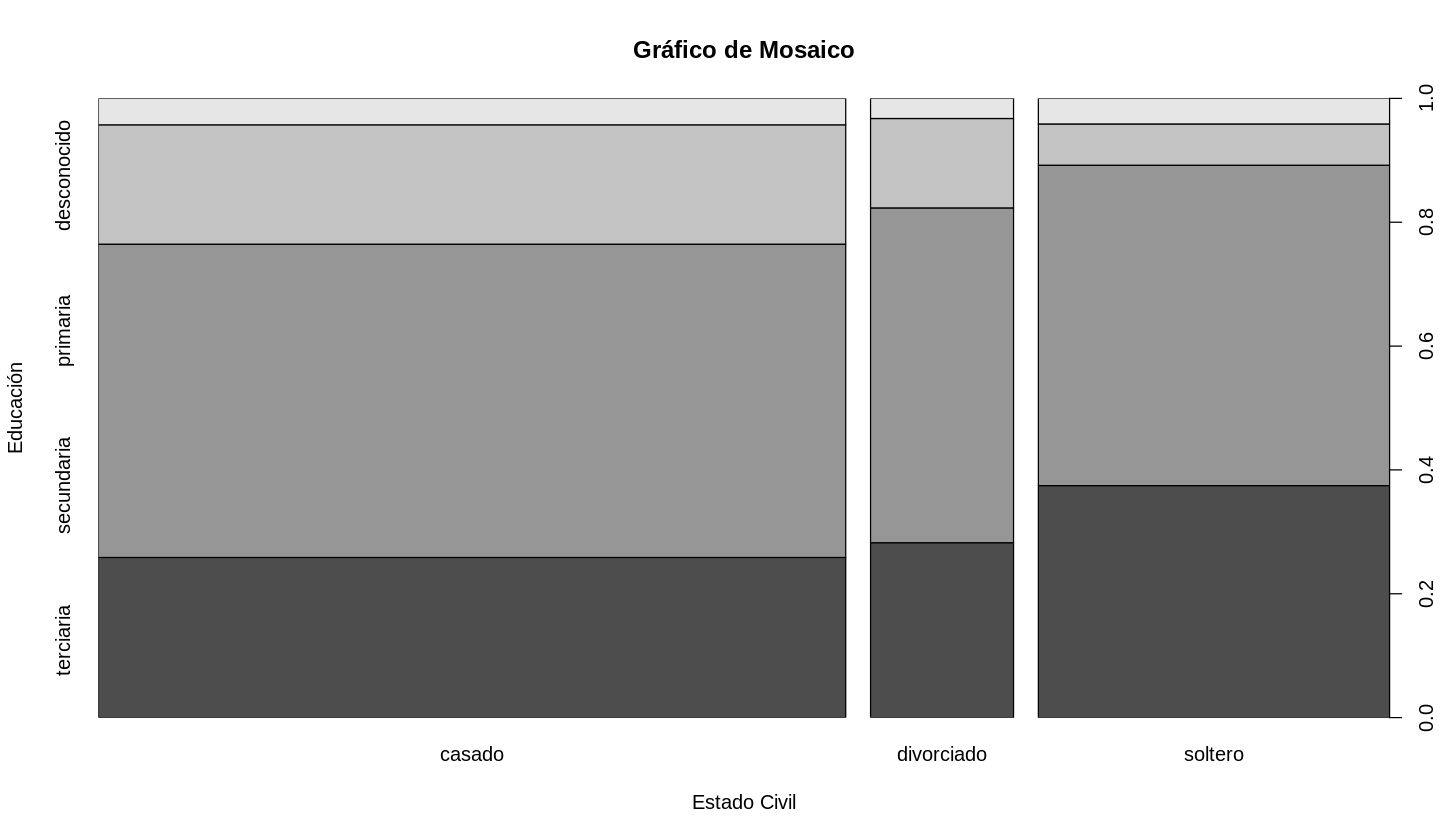

In [38]:
plot(x = banco$civil, 
y = banco$educacion,
main = "Gráfico de Mosaico", 
xlab = "Estado Civil", 
ylab = "Educación")

In [ ]:
     col = c("#99cc99", "#cc9999", "#9999cc", "#9c9c9c"))


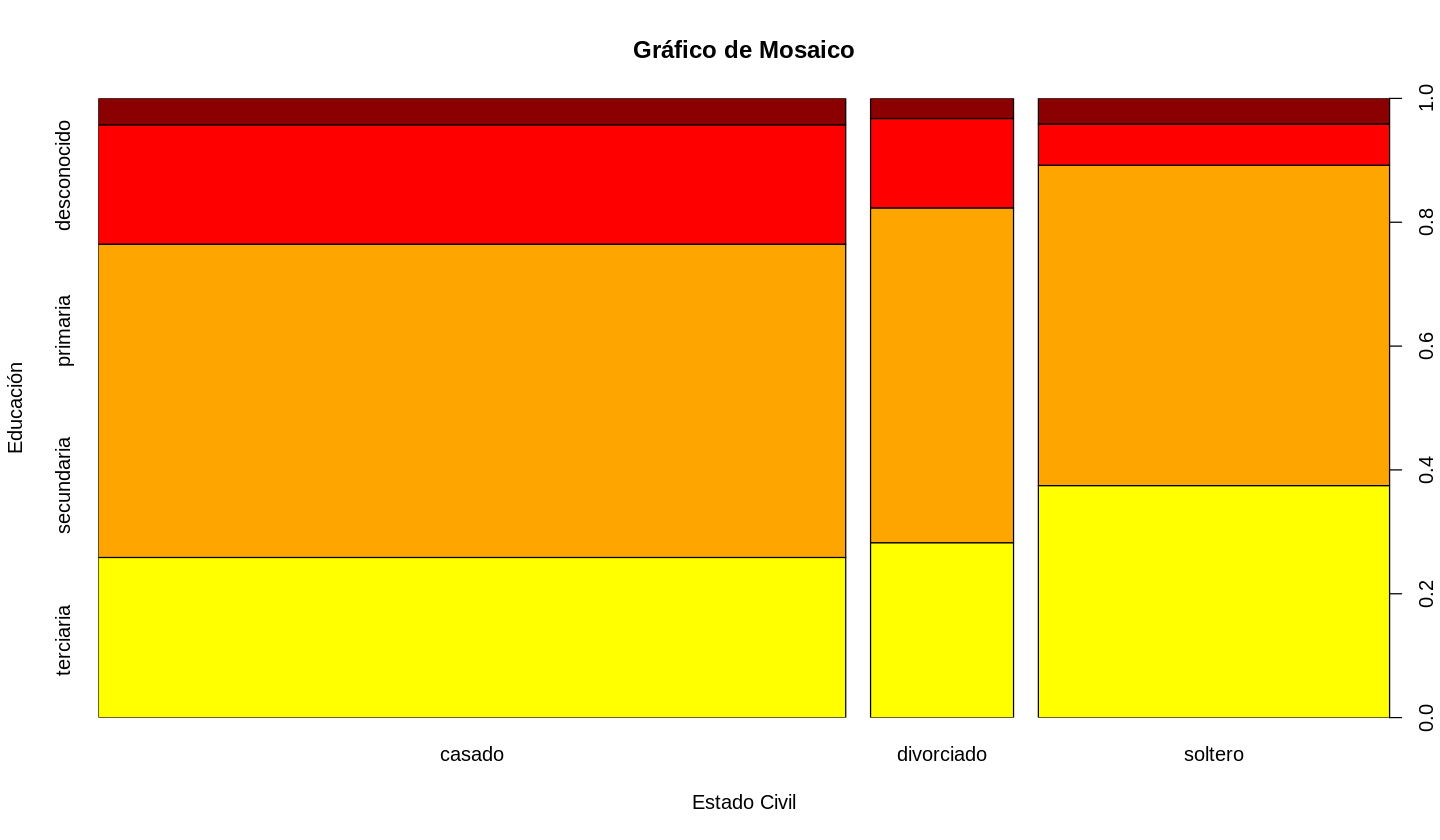

In [39]:
plot(x = banco$civil, 
y = banco$educacion,
main = "Gráfico de Mosaico", 
xlab = "Estado Civil", 
ylab = "Educación",
col = c("yellow", "orange", "red", "darkred"))